## COSC 6880 - DATA ANALYTICS
## Assignment 2: Hypothesis Testing
#### Author: Khoi Nguyen
#### Date: 02/19/2024

## Hypothesis 8: The monthly average wind speed in Corpus Christi per year in the period 2000-2024 follows a normal distribution. 

- Null hypothesis (H<sub>0</sub>): The monthly average wind speed in Corpus Christi per year in the period 2000-2024 follows a normal distribution. 
- Alternative hypothesis (H<sub>1</sub>): The monthly average wind speed in Corpus Christi in at least one year in the period 2000-2024 does not a normal distribution. 

First we will get the monthly precipitation data of Corpus Christi for the years 2000-2024.

### Environment Setup

In [22]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
from scipy import stats

#### Loading Data

In [23]:
corpus_christi_point_data_2000_2006 = pd.read_csv('data/corpus_christi_2000_2006.csv')

In [24]:
corpus_christi_point_data_2007_2024 = pd.read_csv('data/corpus_christi_2007_2024.csv')

In [25]:
# merge the two dataframes
corpus_christi_point_data = pd.concat([corpus_christi_point_data_2000_2006, corpus_christi_point_data_2007_2024])

#### Performing analyses to try to prove or disprove the null hypothesis

In [26]:
# calculate mean of PRCP by time
corpus_christi_ws_data = corpus_christi_point_data.groupby('DATE')['AWND'].mean()
corpus_christi_ws_data = corpus_christi_ws_data.reset_index()

In [27]:
# filter the year 2020
corpus_christi_ws_data_2000 = corpus_christi_ws_data[corpus_christi_ws_data['DATE'].str.contains('2000')]
corpus_christi_ws_data_2000

,DATE,AWND
0,2000-01,12.3
1,2000-02,14.3
2,2000-03,14.5
3,2000-04,12.5
4,2000-05,13.0
5,2000-06,11.4
6,2000-07,11.9
7,2000-08,9.6
8,2000-09,10.5
9,2000-10,12.1


/var/folders/zq/5kj4j29n5g1_svkqqfs5bc4h0000gr/T/ipykernel_74795/3048339752.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


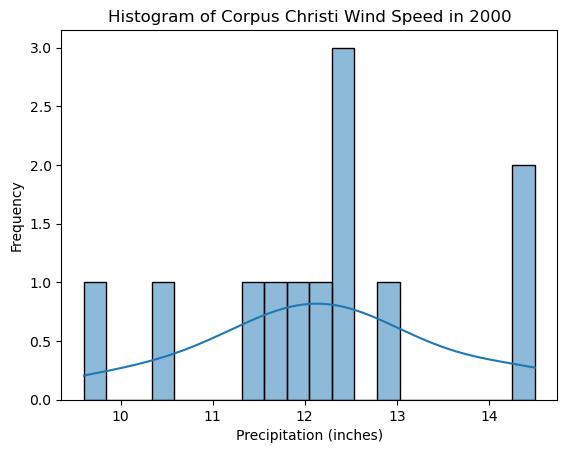

In [28]:
# histogram of precip values
fig, ax = plt.subplots()
sns.histplot(corpus_christi_ws_data_2000['AWND'], kde=True, bins=20, ax=ax)
ax.set_title('Histogram of Corpus Christi Wind Speed in 2000')
ax.set_xlabel('Precipitation (inches)')
ax.set_ylabel('Frequency')
fig.show()

As from the distribution line from histogram, we can see the bell-shaped line, which is considerably similar to normal distribution line. However, we cannot conclude that just from observing this line and instead, we should perform further analysis to evaluate more about this.

In [34]:
# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(corpus_christi_ws_data_2000['AWND'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p_value))

Statistics=0.963, p-value=0.823


Since the distribution line has bell shape which form a normal distribution signature, and the p-value from Shapiro-Wilk test is higher than 0.5, there has been no concrete evidence to prove or disprove the null hypothesis yet.

Therefore, we will continue to perform the hypothesis testing with year 2002.

In [35]:
corpus_christi_ws_data_2001 = corpus_christi_ws_data[corpus_christi_ws_data['DATE'].str.contains('2001')]

/var/folders/zq/5kj4j29n5g1_svkqqfs5bc4h0000gr/T/ipykernel_74795/9702268.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


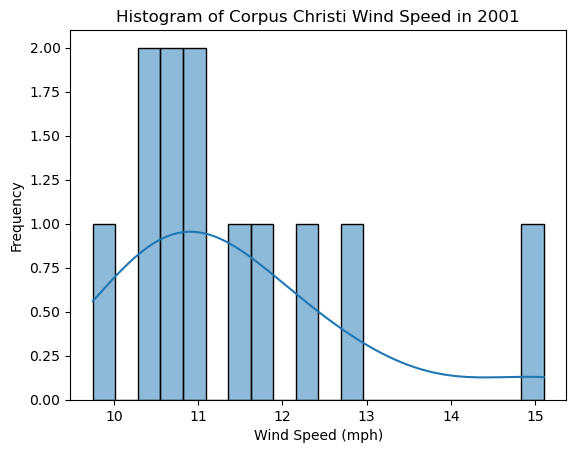

In [36]:
# histogram of average wind speed in 2001
fig, ax = plt.subplots()
sns.histplot(corpus_christi_ws_data_2001['AWND'], kde=True, bins=20, ax=ax)
ax.set_title('Histogram of Corpus Christi Wind Speed in 2001')
ax.set_xlabel('Wind Speed (mph)')
ax.set_ylabel('Frequency')
fig.show()

Although we can properly reject the hypothesis by observing the skewness of the histogram graph, we can also apply some quantitative analyses to the same hypothesis.

In [38]:
# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(corpus_christi_ws_data_2001['AWND'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p_value))

Statistics=0.862, p-value=0.052


#### Chi-square test

To prove or disprove the hypthesis, assuming that the Hypothesis H_0 is true, in which the precipitation in Corpus Christi between 2022 and 2024 is normally distributed. Therefore, we can calculate the expected value in Chi-square test by the special characteristics of normal distribution.

In [39]:
# Bin the data and calculate observed frequencies
bin_edges = np.arange(0, max(corpus_christi_ws_data_2001['AWND']) + 1, 1)  # Adjust binning as needed
print(len(bin_edges))
observed_freq, _ = np.histogram(corpus_christi_ws_data_2001['AWND'], bins=bin_edges)
print()

# Calculate expected frequencies for a normal distribution
mean = np.mean(corpus_christi_ws_data_2001['AWND'])
std = np.std(corpus_christi_ws_data_2001['AWND'])
expected_freq = [len(corpus_christi_ws_data_2001['AWND']) * (stats.norm.cdf(bin_edges[i+1], mean, std) - stats.norm.cdf(bin_edges[i], mean, std)) for i in range(len(bin_edges)-1)]

# Adjust expected frequencies to ensure the sum matches the sum of the observed frequencies
expected_freq = np.array(expected_freq)
expected_freq *= sum(observed_freq) / sum(expected_freq)

# Perform the Chi-square test
chi_square_stat, p_value = stats.chisquare(observed_freq, expected_freq)

print(f"Chi-square statistic: {chi_square_stat}, p-value: {p_value}")

17

Chi-square statistic: 18.975111024085592, p-value: 0.2148639467874645


When applying Chi-square test as a quantitative analysis for this hypothesis, the p-value is 0, which is below 0.5. Therefore, we can apparently reject the hypothesis.

/var/folders/zq/5kj4j29n5g1_svkqqfs5bc4h0000gr/T/ipykernel_74795/4263428218.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


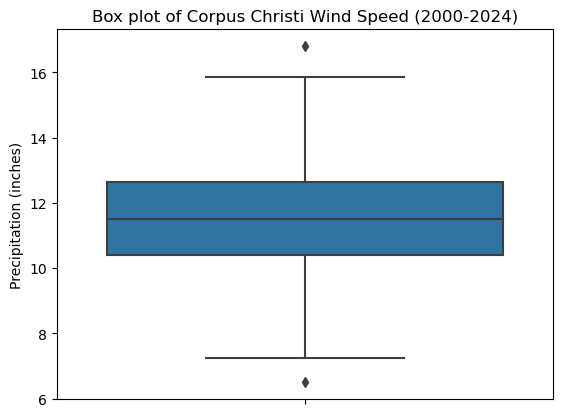

In [31]:
# box plot of precipitation data
fig, ax = plt.subplots()
sns.boxplot(data=corpus_christi_ws_data, y='AWND', ax=ax)
ax.set_title('Box plot of Corpus Christi Wind Speed (2000-2024)')
ax.set_ylabel('Precipitation (inches)')
fig.show()

/var/folders/zq/5kj4j29n5g1_svkqqfs5bc4h0000gr/T/ipykernel_74795/2257053814.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


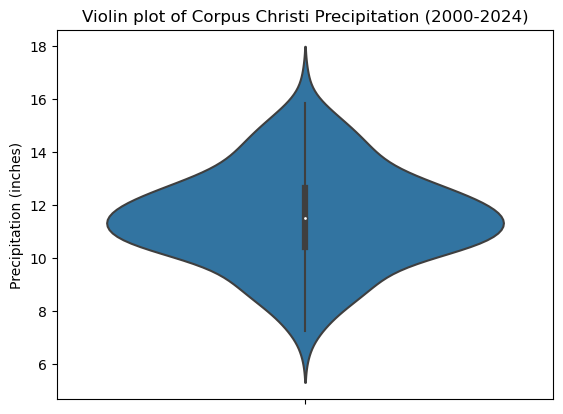

In [32]:
# violin plot of precipitation data
fig, ax = plt.subplots()
sns.violinplot(data=corpus_christi_ws_data, y='AWND', ax=ax)
ax.set_title('Violin plot of Corpus Christi Precipitation (2000-2024)')
ax.set_ylabel('Precipitation (inches)')
fig.show()